In [278]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #-, +
sns.set()


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



In [216]:
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')
sample = pd.read_csv('./data/bike-sharing-demand/sampleSubmission.csv')

In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rdate       10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [218]:
# 방법1
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')
train = pd.read_csv('./data/bike-sharing-demand/train.csv',parse_dates=['datetime'])
test = pd.read_csv('./data/bike-sharing-demand/test.csv', parse_dates=['datetime'])


# 방법2
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')
train['datetime'] = pd.to_datetime (train["datetime"])
test['datetime'] = pd.to_datetime(test['datetime'])


# 방법3
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')
train['datetime'] = train['datetime'].astype('datetime64[ns]')
test['datetime'] = test['datetime'].astype('datetime64[ns]')


# 방법4
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')
train['datetime'] = train['datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
test['datetime'] = test['datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [220]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [221]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [222]:
# 컬럼명 변경
train = train.rename(columns={'datetime':'rdate'})
test = test.rename(columns = {'datetime':'rdate'})
train.columns

Index(['rdate', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [223]:
train.head(3)

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [224]:
df = pd.read_csv('./data/bike-sharing-demand/train.csv')
df = df.rename(columns={'datetime':'rdate'})
#test = pd.read_csv('./data/bike-sharing-demand/test.csv')
df['rdate'] = pd.to_datetime(df['rdate'],format = '%Y-%m-%d %H:%M:%S')
#'%Y-%m-%d %H:%M:%S'

In [225]:
df['casual'][0]

3

In [226]:
for i in range(len(df)):
    if df['casual'][i]+df['registered'][i]!=df['count'][i]:
        print('땡')
    

In [227]:

df['casual']+df['registered']==df['count']

0        True
1        True
2        True
3        True
4        True
         ... 
10881    True
10882    True
10883    True
10884    True
10885    True
Length: 10886, dtype: bool

In [228]:
df = df.drop(['casual', 'registered'],axis=1)

In [229]:
# 날짜 가공
dt.date.today().year, dt.date.today().month, dt.date.today().day

(2022, 7, 14)

In [230]:
yy = []
mm = []
dd = []
week =[]
for i in range(len(df['rdate'])):
    yy.append(df['rdate'][i].date().year)
    mm.append(df['rdate'][i].date().month)
    dd.append(df['rdate'][i].date().day)
    week.append((df['rdate'][i].date().day//7)+1)
df['yy'] = yy
df['mm'] = mm
df['dd'] = dd
df['week'] = week
df.tail(3)

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yy,mm,dd,week
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,3
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,88,2012,12,19,3


In [231]:
df['yy'] = df['rdate'].dt.year
df['mm'] = df['rdate'].dt.month
df['dd'] = df['rdate'].dt.day
df['hh'] = df['rdate'].dt.hour
df['week'] = df['rdate'].dt.weekday #5,6 주말

# 6. 인덱스 지정

In [232]:
# 넣기 : 컬럼 ---> 인덱스
df = df.set_index('rdate')
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yy,mm,dd,week,hh
rdate,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,2,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,2,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,2,21


In [233]:
# 빼기: 인덱스 --> 컬럼
df = df.reset_index()
df

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yy,mm,dd,week,hh
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,2,22


In [234]:
df.groupby('week')['count'].sum()

week
0    295296
1    291985
2    292226
3    306401
4    302504
5    311518
6    285546
Name: count, dtype: int64

In [235]:
df.groupby('yy')['count'].sum()

yy
2011     781979
2012    1303497
Name: count, dtype: int64

In [236]:
df.groupby('mm')['count'].sum()

mm
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [237]:
df.groupby('dd')['count'].sum()

dd
1     103692
2     105381
3     111561
4     112335
5     109115
6     108600
7     105486
8     102770
9     108041
10    111645
11    111146
12    109257
13    111448
14    112406
15    115677
16    109837
17    118255
18    108437
19    110387
Name: count, dtype: int64

In [238]:
df.groupby('season')['count'].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [239]:
pd.crosstab(df[df['weather']==4]['weather'], df['workingday'])

workingday,1
weather,
4,1


In [240]:
df[df['weather']==4]['week'].value_counts()

0    1
Name: week, dtype: int64

# 주가분석

In [241]:
!pip install pykrx

In [242]:
from pykrx import stock

In [243]:
tname = stock.get_market_ticker_name('005930')

In [244]:
tname

'삼성전자'

In [245]:
ssdf = stock.get_market_ohlcv('20220101', '20220331', '005930')
print(ssdf.head(3))

               시가     고가     저가     종가       거래량
날짜                                              
2022-01-03  79400  79800  78200  78600  13502112
2022-01-04  78800  79200  78300  78700  12427416
2022-01-05  78800  79000  76400  77400  25470640


In [246]:
ssdf = ssdf.reset_index()

In [247]:
ssdf.head(3)

,날짜,시가,고가,저가,종가,거래량
0,2022-01-03,79400,79800,78200,78600,13502112
1,2022-01-04,78800,79200,78300,78700,12427416
2,2022-01-05,78800,79000,76400,77400,25470640


In [248]:
ssdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      59 non-null     datetime64[ns]
 1   시가      59 non-null     int32         
 2   고가      59 non-null     int32         
 3   저가      59 non-null     int32         
 4   종가      59 non-null     int32         
 5   거래량     59 non-null     int32         
dtypes: datetime64[ns](1), int32(5)
memory usage: 1.7 KB


In [249]:
ssdf = ssdf.rename(columns = {'날짜':'rdate', '시가':'open', '고가':'high', '저가':'low', '종가':'close', '거래량':'vol'})

In [250]:
ssdf.columns = ['rdate', 'open', 'high' ,'low' ,'close' ,'vol']
ssdf.head(2)

,rdate,open,high,low,close,vol
0,2022-01-03,79400,79800,78200,78600,13502112
1,2022-01-04,78800,79200,78300,78700,12427416


In [251]:
#ssdf.columns = ssdf.columns.str.replace('open2', 'open')

In [252]:
ssdf.columns =[i.upper() for i in ssdf.columns]
ssdf.head(3)

,RDATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2022-01-03,79400,79800,78200,78600,13502112
1,2022-01-04,78800,79200,78300,78700,12427416
2,2022-01-05,78800,79000,76400,77400,25470640


In [253]:
ssdf.columns =[i.lower() for i in ssdf.columns]
ssdf.head(3)

,rdate,open,high,low,close,vol
0,2022-01-03,79400,79800,78200,78600,13502112
1,2022-01-04,78800,79200,78300,78700,12427416
2,2022-01-05,78800,79000,76400,77400,25470640


In [254]:
ssdf.columns = ssdf.columns.str.upper()
ssdf.head(1)

,RDATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2022-01-03,79400,79800,78200,78600,13502112


In [255]:
ssdf.columns = ssdf.columns.str.lower()
ssdf.head(1)

,rdate,open,high,low,close,vol
0,2022-01-03,79400,79800,78200,78600,13502112


In [256]:
close_diff = [0]
for i in range(1, len(ssdf)):
    close_diff.append(ssdf['close'][i]-ssdf['close'][i-1])

ssdf['close_diff']= close_diff
ssdf.head(5)

,rdate,open,high,low,close,vol,close_diff
0,2022-01-03,79400,79800,78200,78600,13502112,0
1,2022-01-04,78800,79200,78300,78700,12427416,100
2,2022-01-05,78800,79000,76400,77400,25470640,-1300
3,2022-01-06,76700,77600,76600,76900,12931954,-500
4,2022-01-07,78100,78400,77400,78300,15163757,1400


In [257]:
ssdf.head(3)

,rdate,open,high,low,close,vol,close_diff
0,2022-01-03,79400,79800,78200,78600,13502112,0
1,2022-01-04,78800,79200,78300,78700,12427416,100
2,2022-01-05,78800,79000,76400,77400,25470640,-1300


In [258]:
close_diff = []
for i in range(len(ssdf)-1):
    close_diff.append(ssdf['close'][i+1]-ssdf['close'][i])
close_diff.append(0)
ssdf['close_diff2']= close_diff
ssdf.head(5)

,rdate,open,high,low,close,vol,close_diff,close_diff2
0,2022-01-03,79400,79800,78200,78600,13502112,0,100
1,2022-01-04,78800,79200,78300,78700,12427416,100,-1300
2,2022-01-05,78800,79000,76400,77400,25470640,-1300,-500
3,2022-01-06,76700,77600,76600,76900,12931954,-500,1400
4,2022-01-07,78100,78400,77400,78300,15163757,1400,-300


In [259]:
for i, row in ssdf.iterrows():
    if i==0: 
        continue
    print(i, row['close'], ssdf.loc[i, 'close'])
    

1 78700 78700
2 77400 77400
3 76900 76900
4 78300 78300
5 78000 78000
6 78900 78900
7 78900 78900
8 77900 77900
9 77300 77300
10 77500 77500
11 77000 77000
12 76300 76300
13 76500 76500
14 75600 75600
15 75100 75100
16 74000 74000
17 73300 73300
18 71300 71300
19 73300 73300
20 73300 73300
21 74000 74000
22 73000 73000
23 73500 73500
24 74700 74700
25 75400 75400
26 74900 74900
27 73700 73700
28 73700 73700
29 74800 74800
30 75000 75000
31 74300 74300
32 74200 74200
33 73400 73400
34 73000 73000
35 71500 71500
36 71900 71900
37 72100 72100
38 71700 71700
39 72900 72900
40 71500 71500
41 70100 70100
42 69500 69500
43 71200 71200
44 70000 70000
45 70200 70200
46 69500 69500
47 70400 70400
48 71200 71200
49 70700 70700
50 69900 69900
51 70300 70300
52 70500 70500
53 69800 69800
54 69800 69800
55 69700 69700
56 70200 70200
57 69900 69900
58 69600 69600


- shift(N)

In [260]:
ssdf['close2']=ssdf['close'].shift(-1)

In [261]:
ssdf['close2'] = ssdf['close'].shift(1)
ssdf['close_diff2'] = ssdf['close']-ssdf['close2']
ssdf.head(2)

,rdate,open,high,low,close,vol,close_diff,close_diff2,close2
0,2022-01-03,79400,79800,78200,78600,13502112,0,NaN,NaN
1,2022-01-04,78800,79200,78300,78700,12427416,100,100.0,78600.0


- diff(N)

In [262]:
ssdf['close_diff3'] = ssdf['close'].diff(1)
ssdf.head(3)

,rdate,open,high,low,close,vol,close_diff,close_diff2,close2,close_diff3
0,2022-01-03,79400,79800,78200,78600,13502112,0,NaN,NaN,NaN
1,2022-01-04,78800,79200,78300,78700,12427416,100,100.0,78600.0,100.0
2,2022-01-05,78800,79000,76400,77400,25470640,-1300,-1300.0,78700.0,-1300.0


In [263]:

int(str(ssdf['rdate']).split('-')[1])

1

In [264]:
ssdf['rdate'][0].month

1

In [265]:
ssdf = ssdf.fillna(0)
sum_1=0
for i in range(len(ssdf)):
    if int(str(ssdf['rdate'][i]).split('-')[1])==1:
    #ssdf['rdate'][i].month==1:    
        sum_1+=ssdf['close_diff'][i]
print(sum_1)

-5300


In [266]:
ssdf['close_diff'][0] = np.nan
ssdf['close_diff'].fillna(method='bfill',inplace=True)
ssdf.head()

,rdate,open,high,low,close,vol,close_diff,close_diff2,close2,close_diff3
0,2022-01-03,79400,79800,78200,78600,13502112,100.0,0.0,0.0,0.0
1,2022-01-04,78800,79200,78300,78700,12427416,100.0,100.0,78600.0,100.0
2,2022-01-05,78800,79000,76400,77400,25470640,-1300.0,-1300.0,78700.0,-1300.0
3,2022-01-06,76700,77600,76600,76900,12931954,-500.0,-500.0,77400.0,-500.0
4,2022-01-07,78100,78400,77400,78300,15163757,1400.0,1400.0,76900.0,1400.0


In [267]:
ssdf.groupby(ssdf['rdate'].dt.month)['close_diff'].sum()

rdate
1   -5200.0
2   -1200.0
3   -2500.0
Name: close_diff, dtype: float64

In [268]:
ssdf['close_diff_cumsum'] = ssdf['close_diff'].cumsum()
ssdf.head(5)

,rdate,open,high,low,close,vol,close_diff,close_diff2,close2,close_diff3,close_diff_cumsum
0,2022-01-03,79400,79800,78200,78600,13502112,100.0,0.0,0.0,0.0,100.0
1,2022-01-04,78800,79200,78300,78700,12427416,100.0,100.0,78600.0,100.0,200.0
2,2022-01-05,78800,79000,76400,77400,25470640,-1300.0,-1300.0,78700.0,-1300.0,-1100.0
3,2022-01-06,76700,77600,76600,76900,12931954,-500.0,-500.0,77400.0,-500.0,-1600.0
4,2022-01-07,78100,78400,77400,78300,15163757,1400.0,1400.0,76900.0,1400.0,-200.0


In [269]:
# cnt_t=0
# sum_t=0
# for i in range(len(ssdf)):
#     if cnt_t==4:
#         print(sum_t/cnt_t)
#         cnt_t=0
#         sum_t=0
#     else:
#         sum_t+=ssdf['close'][i]
#         cnt_t+=1
# print(sum_t/cnt_t)

# EDA (Exploratory Data Analysis)
- 탐색적 데이터 분석

In [286]:
year = df.groupby('yy')['count'].sum().index
cnt = df.groupby('yy')['count'].sum().values
print(year, count)

Int64Index([2011, 2012], dtype='int64', name='yy') [ 781979 1303497]


Text(0.5, 1.0, 'Rental amounts by year')

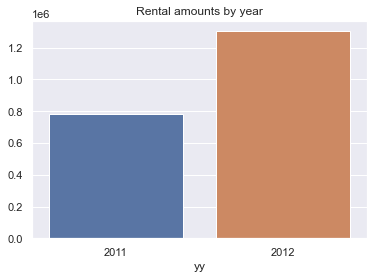

In [287]:
year = df.groupby('yy')['count'].sum().index
cnt = df.groupby('yy')['count'].sum().values
ax = sns.barplot(x=year, y=cnt)
ax.set_title('Rental amounts by year')

Text(0.5, 1.0, 'Rental amounts by month')

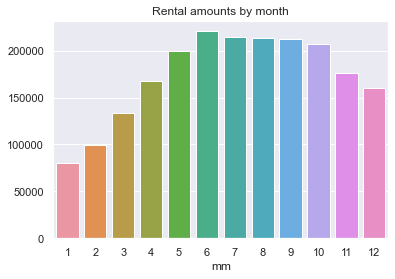

In [288]:
year = df.groupby('mm')['count'].sum().index
cnt = df.groupby('mm')['count'].sum().values
ax = sns.barplot(x=year, y=cnt)
ax.set_title('Rental amounts by month')

Text(0.5, 1.0, 'Rental amounts by day')

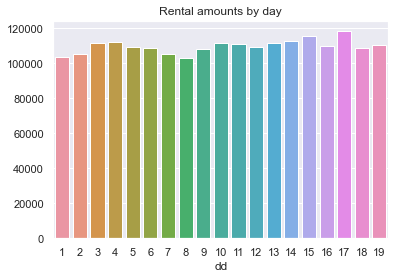

In [289]:
year = df.groupby('dd')['count'].sum().index
cnt = df.groupby('dd')['count'].sum().values
ax = sns.barplot(x=year, y=cnt)
ax.set_title('Rental amounts by day')

Text(0.5, 1.0, 'Rental amounts by hour')

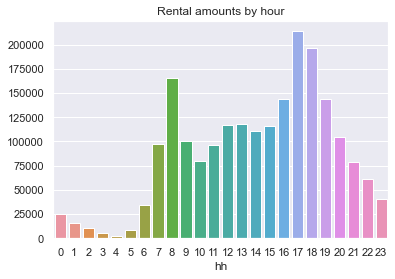

In [290]:
year = df.groupby('hh')['count'].sum().index
cnt = df.groupby('hh')['count'].sum().values
ax = sns.barplot(x=year, y=cnt)
ax.set_title('Rental amounts by hour')

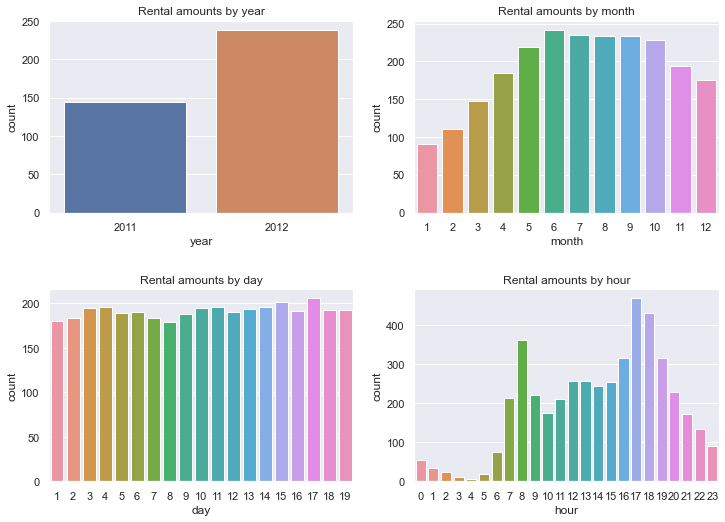

In [320]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
year = df.groupby('yy')['count'].mean().index
cnt = df.groupby('yy')['count'].mean().values
sns.barplot(x=year, y=cnt, ax=axes[0][0])
axes[0][0].set_title('Rental amounts by year')
axes[0][0].set_xlabel('year')
axes[0][0].set_ylabel('count')

year = df.groupby('mm')['count'].mean().index
cnt = df.groupby('mm')['count'].mean().values
axes[0][1] = sns.barplot(x=year, y=cnt, ax=axes[0][1])
axes[0][1].set_title('Rental amounts by month')
axes[0][1].set_xlabel('month')
axes[0][1].set_ylabel('count')

year = df.groupby('dd')['count'].mean().index
cnt = df.groupby('dd')['count'].mean().values
axes[1][0] = sns.barplot(x=year, y=cnt, ax=axes[1][0])
axes[1][0].set_title('Rental amounts by day')
axes[1][0].set_xlabel('day')
axes[1][0].set_ylabel('count')

year = df.groupby('hh')['count'].mean().index
cnt = df.groupby('hh')['count'].mean().values
axes[1][1] = sns.barplot(x=year, y=cnt, ax=axes[1][1])
axes[1][1].set_title('Rental amounts by hour')
axes[1][1].set_xlabel('hour')
axes[1][1].set_ylabel('count')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

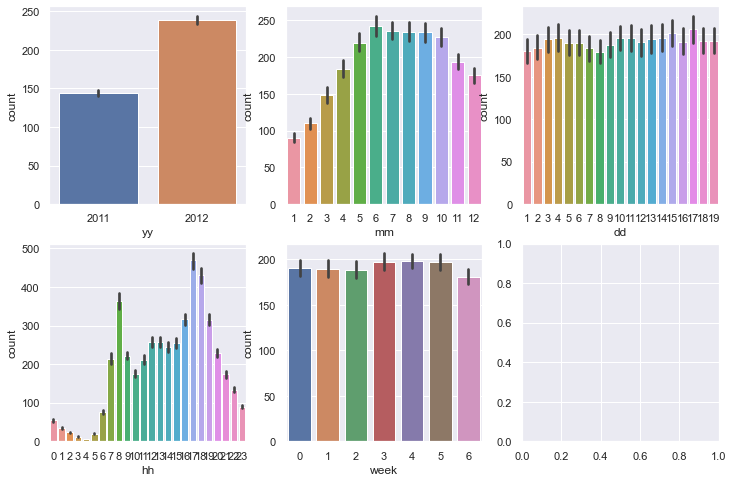

In [322]:
p, axes = plt.subplots(2,3,figsize=(12,8))
sns.barplot(df['yy'], df['count'], ax=axes[0][0])
sns.barplot(df['mm'], df['count'], ax=axes[0][1])
sns.barplot(df['dd'], df['count'], ax=axes[0][2])
sns.barplot(df['hh'], df['count'], ax=axes[1][0])
sns.barplot(df['week'], df['count'], ax=axes[1][1])
plt.show()

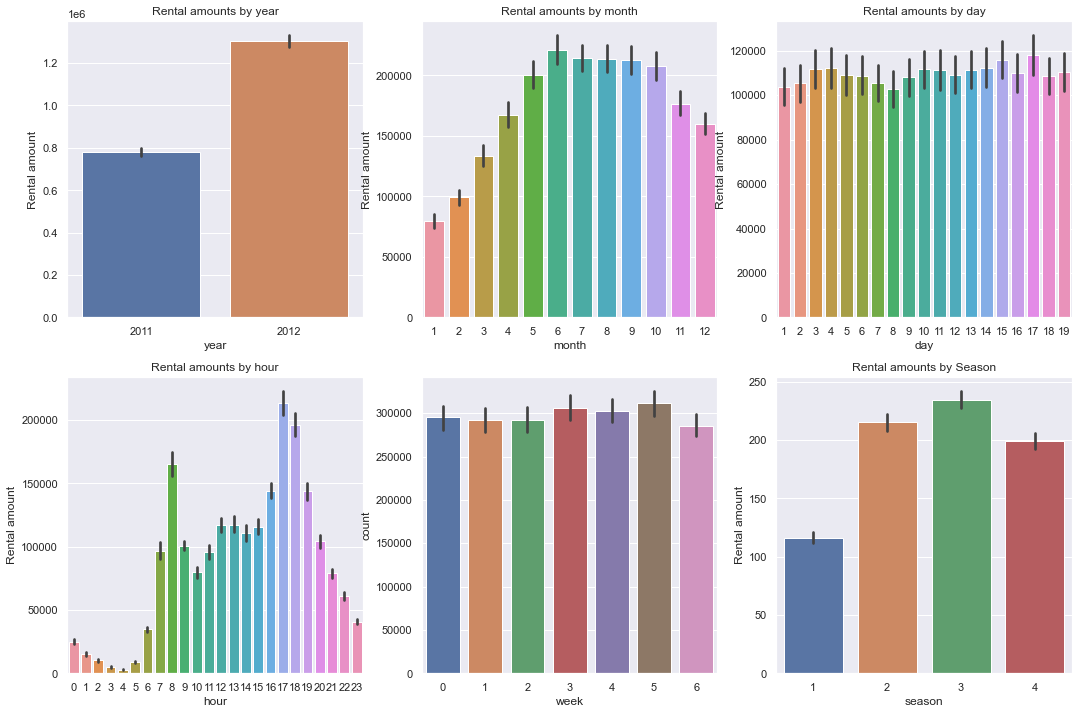

In [361]:
fig, ax = plt.subplots(2,3,figsize = (18,12))
ax1=sns.barplot(x = df['yy'],     y =  df['count'],  estimator=np.sum,   ax = ax[0, 0])
ax2=sns.barplot(x = df['mm'],     y =  df['count'],  estimator=np.sum,   ax = ax[0, 1])
ax3=sns.barplot(x = df['dd'],     y =  df['count'],  estimator=np.sum,   ax = ax[0, 2])
ax4=sns.barplot(x = df['hh'],     y =  df['count'],  estimator=np.sum,   ax = ax[1, 0])
ax5=sns.barplot(x = df['week'],   y =  df['count'],  estimator=np.sum,   ax = ax[1, 1])
ax5=sns.barplot(x = df['season'], y =  df['count'], ax = ax[1, 2])
ax1.set_title('Rental amounts by year')
ax1.set(xlabel='year', ylabel='Rental amount')
ax2.set_title('Rental amounts by month')
ax2.set(xlabel='month', ylabel='Rental amount')
ax3.set_title('Rental amounts by day')
ax3.set(xlabel='day', ylabel='Rental amount')
ax4.set_title('Rental amounts by hour')
ax4.set(xlabel='hour', ylabel='Rental amount')
ax5.set_title('Rental amounts by Season')
ax5.set(xlabel='season', ylabel='Rental amount')
plt.show()


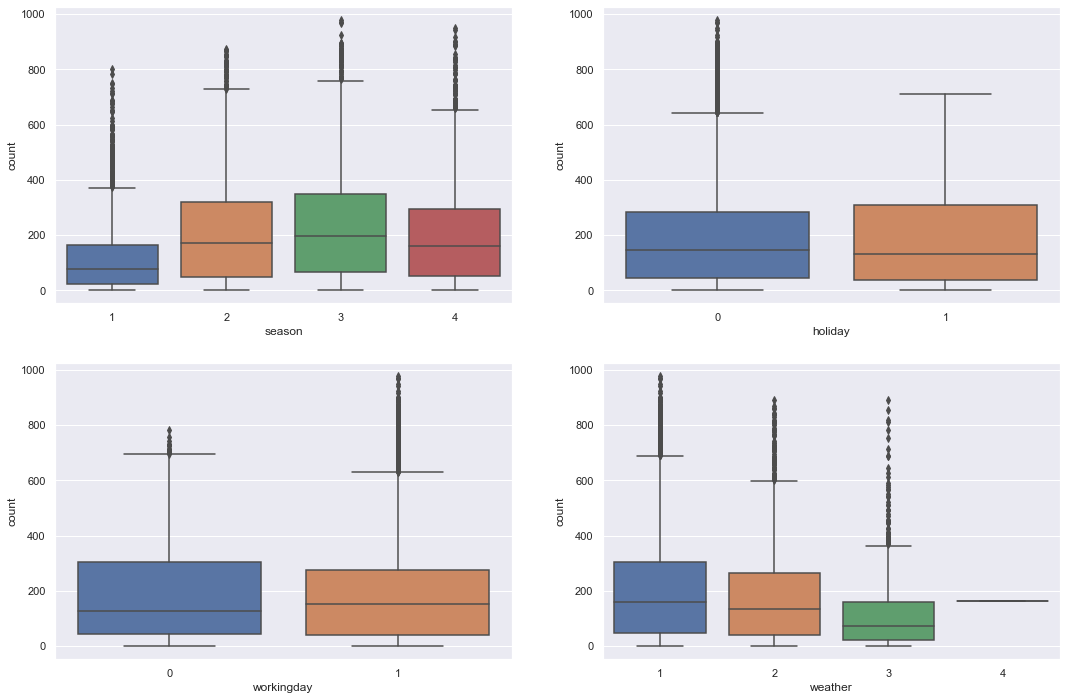

In [363]:
fig, axes = plt.subplots(2,2,figsize = (18,12))
sns.boxplot(df['season'], df['count'], ax=axes[0][0])
sns.boxplot(df['holiday'], df['count'], ax=axes[0][1])
sns.boxplot(df['workingday'], df['count'], ax=axes[1][0])
sns.boxplot(df['weather'], df['count'], ax=axes[1][1])
plt.show()

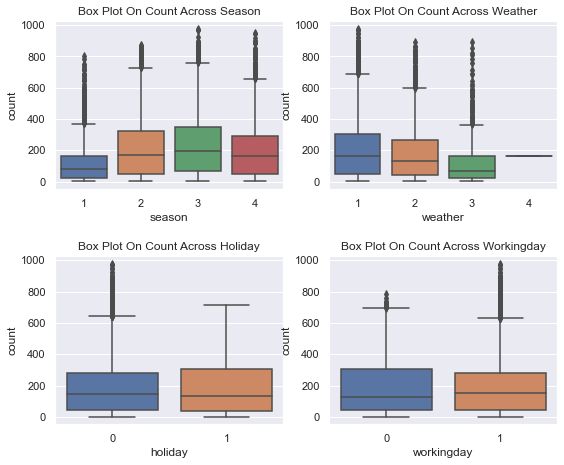

In [332]:
fig, ax = plt.subplots(2,2, figsize=(9,7)) 

plt.tight_layout()

sn = sns.boxplot(df['season'], df['count'], ax=ax[0,0])
wr = sns.boxplot(df['weather'], df['count'], ax=ax[0,1])
hy = sns.boxplot(df['holiday'], df['count'], ax=ax[1,0])
wy = sns.boxplot(df['workingday'], df['count'], ax=ax[1,1])

sn.set_title("Box Plot On Count Across Season")
wr.set_title("Box Plot On Count Across Weather")
hy.set_title("Box Plot On Count Across Holiday")
wy.set_title("Box Plot On Count Across Workingday")
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

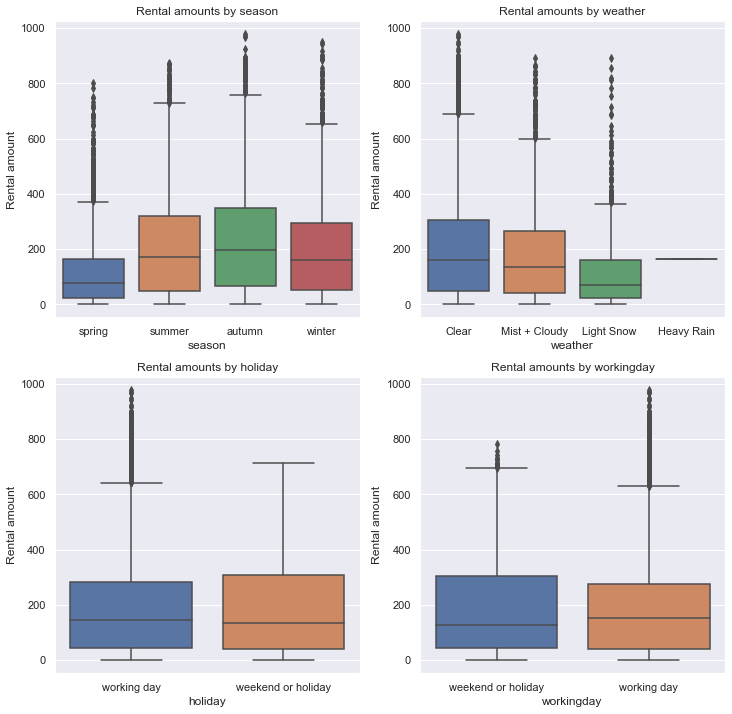

In [333]:
fig, ax = plt.subplots(2,2,figsize = (12,12))
ax1=sns.boxplot(x = df['season'].replace([1,2,3,4],['spring','summer', 'autumn', 'winter']),     y =  df['count'], ax = ax[0, 0])
ax2=sns.boxplot(x = df['weather'].replace([1,2,3,4], ['Clear', 'Mist + Cloudy', 'Light Snow ', 'Heavy Rain']),     y =  df['count'], ax = ax[0, 1])
ax3=sns.boxplot(x = df['holiday'].replace([0,1], ['working day','weekend or holiday']),     y =  df['count'], ax = ax[1, 0])
ax4=sns.boxplot(x = df['workingday'].replace([0,1], ['weekend or holiday','working day']),     y =  df['count'], ax = ax[1, 1])
ax1.set_title('Rental amounts by season')
ax1.set(xlabel='season', ylabel='Rental amount')
ax2.set_title('Rental amounts by weather')
ax2.set(xlabel='weather', ylabel='Rental amount')
ax3.set_title('Rental amounts by holiday')
ax3.set(xlabel='holiday', ylabel='Rental amount')
ax4.set_title('Rental amounts by workingday')
ax4.set(xlabel='workingday', ylabel='Rental amount')
plt.show()


In [ ]:
fig, ax = plt.subplots(2,2, figsize=(9,7)) 

plt.tight_layout()

sn = sns.boxplot(df['season'], df['count'], ax=ax[0,0])
wr = sns.boxplot(df['weather'], df['count'], ax=ax[0,1])
hy = sns.boxplot(df['holiday'], df['count'], ax=ax[1,0])
wy = sns.boxplot(df['workingday'], df['count'], ax=ax[1,1])

sn.set_title("Box Plot On Count Across Season")
wr.set_title("Box Plot On Count Across Weather")
hy.set_title("Box Plot On Count Across Holiday")
wy.set_title("Box Plot On Count Across Workingday")
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

<AxesSubplot:xlabel='season', ylabel='count'>

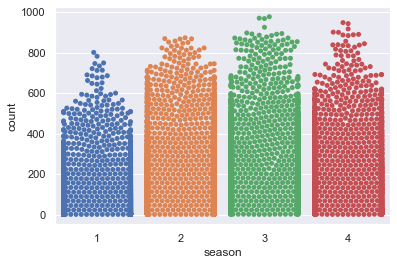

In [334]:
sns.swarmplot(data=df, x='season', y='count')

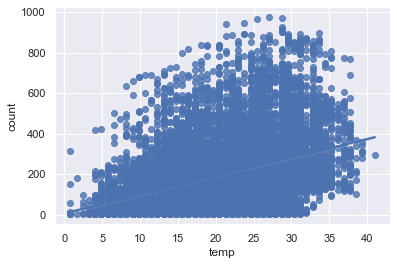

In [335]:
sns.regplot(x='temp', y='count', data=df)
plt.show()

<AxesSubplot:xlabel='temp', ylabel='count'>

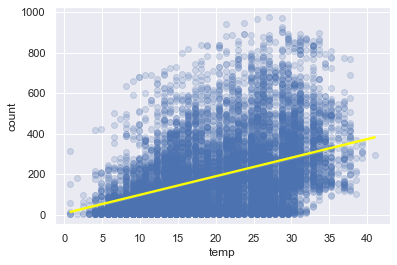

In [338]:
sns.regplot(x='temp', y='count', data=df, scatter_kws={'alpha': 0.2}
            , line_kws={'color': 'yellow'})


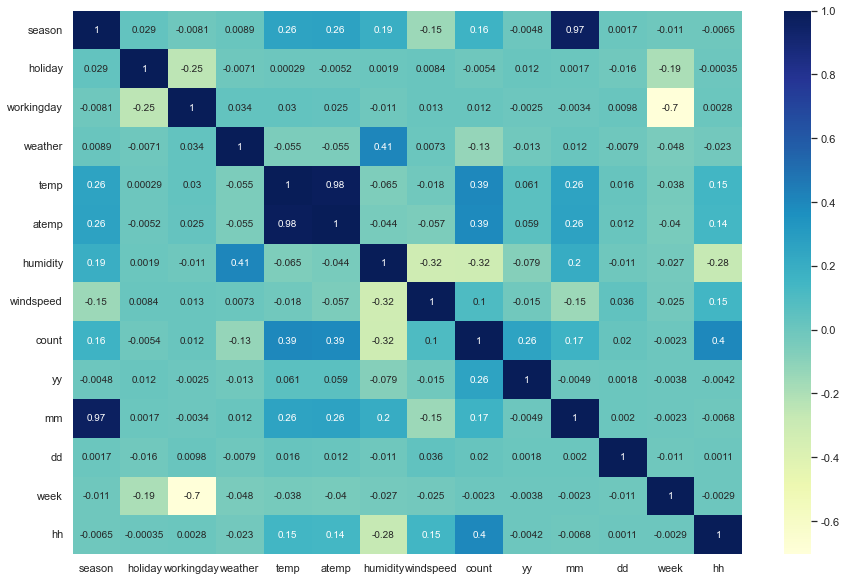

In [342]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

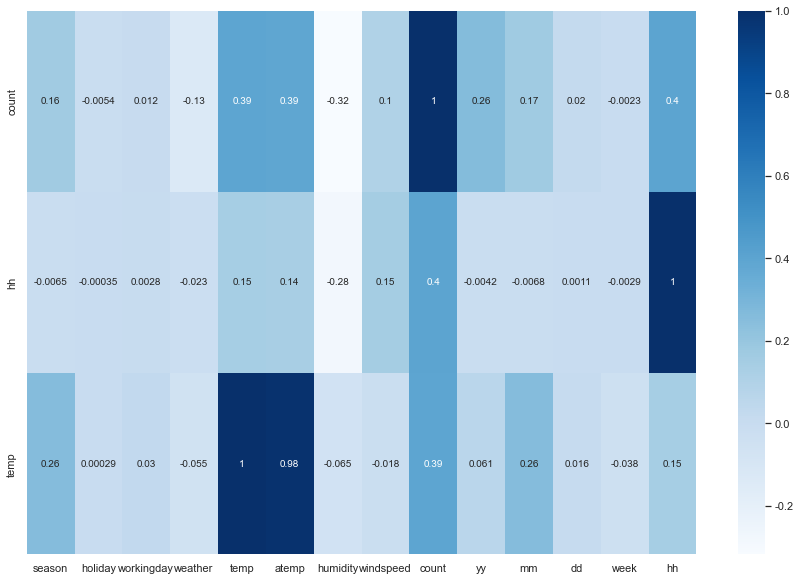

In [352]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().nlargest(3,'count'), annot=True, cmap='Blues')
plt.show()

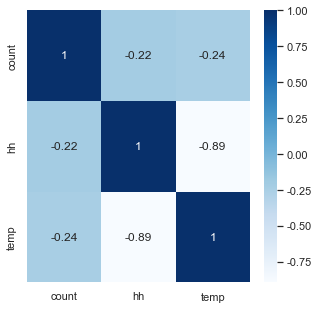

In [356]:
plt.figure(figsize=(5,5))
ldf = df.corr().nlargest(3,'count')
sns.heatmap(ldf[ldf.index].corr(), annot=True, cmap='Blues')
plt.show()

In [360]:
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
yy            0.260403
mm            0.166862
dd            0.019826
week         -0.002283
hh            0.400601
Name: count, dtype: float64

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yy,mm,dd,week,hh
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,-0.024804,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,-0.002283,0.400601
yy,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.003785,-0.004234
